In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("tkt_country_clean.csv")

In [3]:
df = df[df.ISSUE_YR >= 2020]

In [4]:
df = df.drop(["ISSUE_YR", "ISSUE_WEEK"], axis=1)

In [5]:
df = df[(df.TRAVELER_TYPE=="Business") & (df.GEO_SEGMENTS=="TR_domestic")]\
     [["time", "covid_policy", "Fuel Price", "TOTAL_TICKETS"]]

In [6]:
df['time'] = df['time'].apply(lambda x:x-156)

In [8]:
df[df.time<52]

,time,covid_policy,Fuel Price,TOTAL_TICKETS
4882,1,0.000000,1.953,4
4883,2,0.000000,1.902,14
4884,3,0.000000,1.796,7
4885,4,0.000000,1.704,19
4886,5,0.000000,1.589,20
4887,6,0.000000,1.499,14
4888,7,0.000000,1.544,21
4889,8,0.000000,1.577,22
4890,9,0.000000,1.431,21
4891,10,0.000000,1.392,14


In [1072]:
df.index = range(0,122)

ValueError: Length mismatch: Expected axis has 116 elements, new values have 122 elements

In [1052]:
oil = pd.read_csv("Oil_Price.csv")

In [1053]:
oil = oil[(oil.ISSUE_YEAR>=2020) & (oil.ISSUE_WEEK<=52)]

In [1054]:
oil["time"] = range(1,261)

In [1055]:
oil = oil[["time", "Oil Price"]]

In [1056]:
oil.index = range(0,260)

In [1057]:
train = oil[oil.time<=122]
test = oil[oil.time>122]

In [1058]:
train = pd.concat([train, df[["covid_policy", "TOTAL_TICKETS"]]], axis=1)

In [304]:
from sklearn.linear_model import LinearRegression
from math import log, exp

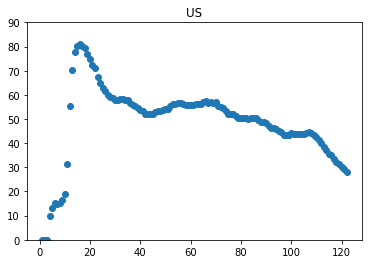

In [1059]:
plt.scatter(train.time, train.covid_policy)
plt.title('US')
plt.ylim(0,90)
plt.show()

In [1060]:
train[train.time>=100]

,time,Oil Price,covid_policy,TOTAL_TICKETS
99,100,79.015,44.034218,267975
100,101,68.945,43.898134,269908
101,102,73.050,43.825529,277136
102,103,72.470,43.876689,236269
103,104,72.770,43.964807,180021
104,105,79.180,43.843425,352304
105,106,83.295,44.176892,296274
106,107,87.545,44.470886,297130
107,108,88.530,44.146391,309107
108,109,91.185,43.569332,316920


In [184]:
lm = LinearRegression()

In [1061]:
lm.fit(train[train.time>=112].time.values.reshape(-1, 1), \
       train[train.time>=112].covid_policy.apply(lambda x:log(x)).values.reshape(-1, 1))

LinearRegression()

In [924]:
lm.fit(train[(train.time>=90)&(train.time<=100)].time.apply(lambda x:x+33).values.reshape(-1, 1), \
       train[(train.time>=90)&(train.time<=100)].covid_policy.apply(lambda x:log(x)).values.reshape(-1, 1))

LinearRegression()

In [1062]:
pred = lm.predict(test.time.values.reshape(-1, 1))

In [258]:
pred

array([[  2.86189268],
       [  2.75795095],
       [  2.65400921],
       [  2.55006748],
       [  2.44612574],
       [  2.34218401],
       [  2.23824228],
       [  2.13430054],
       [  2.03035881],
       [  1.92641707],
       [  1.82247534],
       [  1.7185336 ],
       [  1.61459187],
       [  1.51065013],
       [  1.4067084 ],
       [  1.30276667],
       [  1.19882493],
       [  1.0948832 ],
       [  0.99094146],
       [  0.88699973],
       [  0.78305799],
       [  0.67911626],
       [  0.57517452],
       [  0.47123279],
       [  0.36729106],
       [  0.26334932],
       [  0.15940759],
       [  0.05546585],
       [ -0.04847588],
       [ -0.15241762],
       [ -0.25635935],
       [ -0.36030109],
       [ -0.46424282],
       [ -0.56818455],
       [ -0.67212629],
       [ -0.77606802],
       [ -0.88000976],
       [ -0.98395149],
       [ -1.08789323],
       [ -1.19183496],
       [ -1.2957767 ],
       [ -1.39971843],
       [ -1.50366016],
       [ -1

In [1063]:
test['covid_policy'] = pred

<ipython-input-1063-63d286e6d6d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['covid_policy'] = pred


In [1064]:
test['covid_policy'] = test['covid_policy'].apply(lambda x:exp(x))

<ipython-input-1064-69add068b1cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['covid_policy'] = test['covid_policy'].apply(lambda x:exp(x))


In [850]:
train['covid_policy'] = train.covid_policy.apply(lambda x:x/3)
test['covid_policy'] = test.covid_policy.apply(lambda x:x/3)

<ipython-input-850-8591c7e8c7de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['covid_policy'] = test.covid_policy.apply(lambda x:x/3)


In [1065]:
test.to_csv("TR_domestic_B_test.csv", index=False)

In [1066]:
train.to_csv("TR_domestic_B_train.csv", index=False)

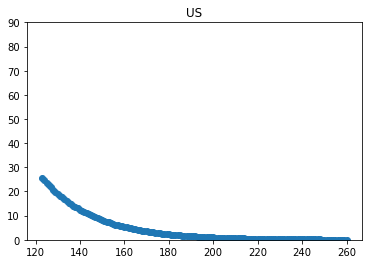

In [398]:
plt.scatter(test.time, test.covid_policy)
plt.title('US')
plt.ylim(0,90)
plt.show()